In [20]:
import math
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz, simps, cumtrapz

from scipy.interpolate import interp1d

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Расчет

Некоторые константы

In [21]:
Q_EC_127Xe=0.662 #in MeV
Z_127Xe=54

g_a_g_v=1.297 #ratio of vector and axial coupling constants

BS05_OP_pep_ampl=1.42e8
pep_en=1.442 #MeV

Be384_en = 0.384 #Mev 
Be862_en = 0.862 #Mev

S_n = 7.246 #энергия отрыва нейтрона

total_GT = 53.54
#total_GT = 63

Функция для расчета порога реакции

In [22]:
def Q_k_func(E_k, Q_EC):
    #Считаем порог реакции, E_k - энергия возбужденного состояния в BGT
    #E_k in KeV
    return Q_EC+E_k/1000

Привиденная энергия вылетающего электрона: $\epsilon_e = \frac{E_{\nu}-Q_k}{m_e} + 1$

In [23]:
def e_e_func(E_nu, E_k, Q_EC):
    #Считаем привиденную энергию вылетающего электрона. Если энергия налетающего нейтрино E_nu
    #меньше порога, возвращаем 0 для обнуления итогового сечения
    #E_nu in MeV
    q=Q_k_func(E_k, Q_EC) #порог реакции
    if E_nu>q: return 1+(E_nu-q)/0.511
    else: return 0 

Привиденный импульс электрона: $\pi_e=\sqrt{\epsilon_e^2 -1}$

In [24]:
def Pi_e_func(e_e):
    #Привиденный импульс электрона, вычисляется через привиденную энергию; ** означает степень  
    if e_e>1: return math.sqrt(e_e**2 - 1)
    else: return 0

In [25]:
def integrate_func(a, b, x, y):
    return np.sum( np.interp(x=np.arange(a, b, 0.001), xp=x, fp=y ) * 0.001 )

### Fermi-function from Suslov

In [26]:
Et_53=[5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,
110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,
340,350,360,370,380,390,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200,1300,
1400,1500,1600,1700,1800,1900,2000,2200,2400,2600,2800,3000,3200,3400,3600,3800,4000,4500,
5000,5500,6000,7000,8000,9000,10000]

Ft_53=[43.66,39.89,36.97,34.61,32.67,31.02,28.37,26.31,24.66,23.29,22.18,21.14,20.27,19.51,
18.83,18.22,16.94,15.91,15.06,14.35,13.75,13.22,12.76,12.35,11.99,11.66,11.37,11.10,10.85,
10.62,10.22,9.879,9.577,9.310,9.074,8.862,8.671,8.498,8.340,8.196,8.063,7.940,7.827,7.721,
7.622,7.530,7.443,7.362,7.385,7.212,7.144,7.079,7.017,6.958,6.902,6.848,6.797,6.748,6.701,
6.656,6.456,6.289,6.147,6.024,5.916,5.820,5.734,5.656,5.584,5.518,5.457,5.400,5.296,5.203,
5.119,5.043,4.973,4.908,4.848,4.791,4.733,4.687,4.594,4.508,4.428,4.354,4.284,4.218,4.156,
4.096,4.040,3.985,3.858,3.741,3.633,3.532,3.346,3.191,3.054,2.926]

#def Suslov_func(e_e):
#def num_tables_func(x):
#    #input энергия электрона в МэВ
#    return np.interp(x, xp = np.array(Et_53)/511 + 1, 
#                     fp = np.array(Ft_53))

def num_tables_func(x):
    #input энергия электрона в МэВ
    f = interp1d(x=np.array(Et_53)/511 + 1, y=np.array(Ft_53), kind='linear', 
                 fill_value='extrapolate')
    return f(x)

### BS05_OP flux

In [27]:
BS05OP_Be = 4.84e9
BS05OP_pp = 5.99e10
BS05OP_pep = 1.42e8
BS05OP_hep = 7.93e3
BS05OP_B = 5.69e6
BS05OP_N = 3.07e8
BS05OP_0 = 2.33e8
BS05OP_F = 5.84e6

In [28]:
BP98_Be = 4.80e9
BP98_pp = 5.94e10
BP98_pep = 1.39e8
BP98_hep = 2.10e3
BP98_B = 5.15e6 
BP98_N = 6.05e8
BP98_0 = 5.32e8
BP98_F = 6.33e6

In [29]:
BP98_OPAL92_Be = 4.94e9
BP98_OPAL92_pp = 5.92e10
BP98_OPAL92_pep = 1.39e8
BP98_OPAL92_hep = 2.08e3
BP98_OPAL92_B = 5.44e6 
BP98_OPAL92_N = 6.25e8
BP98_OPAL92_0 = 5.52e8
BP98_OPAL92_F = 6.59e6

In [30]:
#B16-GS98 - high metallicity
B16_GS98_Be = 4.93e9
B16_GS98_pp = 5.98e10
B16_GS98_pep = 1.44e8
B16_GS98_hep = 7.98e3
B16_GS98_B = 5.46e6 
B16_GS98_N = 2.78e8
B16_GS98_0 = 2.05e8
B16_GS98_F = 5.29e6

In [31]:
#B16-AGSS09met - low metallicity
B16_AGSS09met_Be = 4.50e9
B16_AGSS09met_pp = 6.03e10
B16_AGSS09met_pep = 1.46e8
B16_AGSS09met_hep = 8.25e3
B16_AGSS09met_B = 4.50e6 
B16_AGSS09met_N = 2.04e8
B16_AGSS09met_0 = 1.44e8
B16_AGSS09met_F = 3.26e6

In [32]:
step_all_fluxes = 0.001 #MeV
Energy_all_fluxes = np.arange(0,20,step_all_fluxes)

In [33]:
def return_flux(pp_ampl, hep_ampl, B_ampl, N_ampl, O_ampl, F_ampl, 
                energy_list = Energy_all_fluxes):
    pp = pd.read_excel('../Solar_neutrino_flux/pp.xls')
    b8 = pd.read_excel('../Solar_neutrino_flux/b8.xls')
    hep = pd.read_excel('../Solar_neutrino_flux/hep.xls')
    n13 = pd.read_excel('../Solar_neutrino_flux/n13.xls')
    o15 = pd.read_excel('../Solar_neutrino_flux/o15.xls')
    f17 = pd.read_excel('../Solar_neutrino_flux/f17.xls')

    flux = {
        'pp':np.interp(x=Energy_all_fluxes, xp=pp['Energy'].values, 
                       fp=pp['Probability'].values * pp_ampl ),
        'b8':np.interp(x=Energy_all_fluxes, xp=b8['Energy'].values, 
                       fp=b8['Probability'].values * B_ampl ),
        'hep':np.interp(x=Energy_all_fluxes, xp=hep['Energy'].values, 
                       fp=hep['Probability'].values * hep_ampl ),
        'n13':np.interp(x=Energy_all_fluxes, xp=n13['Energy'].values, 
                       fp=n13['Probability'].values * N_ampl ),
        'o15':np.interp(x=Energy_all_fluxes, xp=o15['Energy'].values, 
                       fp=o15['Probability'].values * O_ampl ),
        'f17':np.interp(x=Energy_all_fluxes, xp=f17['Energy'].values, 
                       fp=f17['Probability'].values * F_ampl ),
    }
    return flux

In [34]:
BS05OP_flux = return_flux(pp_ampl=BS05OP_pp, 
                          hep_ampl=BS05OP_hep,
                          B_ampl=BS05OP_B,
                          N_ampl=BS05OP_N,
                          O_ampl=BS05OP_0,
                          F_ampl=BS05OP_F)

BP98_flux = return_flux(pp_ampl=BP98_pp, 
                          hep_ampl=BP98_hep,
                          B_ampl=BP98_B,
                          N_ampl=BP98_N,
                          O_ampl=BP98_0,
                          F_ampl=BP98_F)

BP98_OPAL92_flux = return_flux(pp_ampl=BP98_OPAL92_pp, 
                          hep_ampl=BP98_OPAL92_hep,
                          B_ampl=BP98_OPAL92_B,
                          N_ampl=BP98_OPAL92_N,
                          O_ampl=BP98_OPAL92_0,
                          F_ampl=BP98_OPAL92_F)

B16_GS98_flux = return_flux(pp_ampl=B16_GS98_pp, 
                          hep_ampl=B16_GS98_hep,
                          B_ampl=B16_GS98_B,
                          N_ampl=B16_GS98_N,
                          O_ampl=B16_GS98_0,
                          F_ampl=B16_GS98_F)

B16_AGSS09met_flux = return_flux(pp_ampl=B16_AGSS09met_pp, 
                          hep_ampl=B16_AGSS09met_hep,
                          B_ampl=B16_AGSS09met_B,
                          N_ampl=B16_AGSS09met_N,
                          O_ampl=B16_AGSS09met_0,
                          F_ampl=B16_AGSS09met_F)

### Cross-section and total rate

Сечение по Иджири $\sigma_k={(10^{-44}\ cm^2)}\times 1.597\cdot \epsilon_e \pi_e m_e^2 F(Z,E_e) [B(F)_k + (\frac{g_a}{g_v})^2 B(GT)_k] $ 

In [35]:
g_a_g_v_square = math.pow(g_a_g_v,2)
m_e_square = math.pow(0.511,2)

In [36]:
#расчет сечения до энергии возбуждения 5 МэВ
def sigma_k_less5(E_nu, E_k, BGT_k, Z, Q_EC):
    #E_k in kev
    #сечение k-го возб. состояния по Иджири
    e_e=e_e_func(E_nu, E_k, Q_EC) #энергия вылетающего электрона
    Pi_e=Pi_e_func(e_e) #его импульс
    F_col=num_tables_func(e_e) #значение ферм-функции при такой энергии
    return 1.597*m_e_square*e_e*Pi_e*F_col*g_a_g_v_square*BGT_k

In [37]:
#функция расчета свертки сечения с потоком
def rate_calc(sigma, fluxes_dict, energies_array, step, func_pep_ampl = BS05OP_pep, 
              func_Be_ampl = BS05OP_Be, name = 'test1'):
    
    #const = 1.597*math.pow(10,-44)
    const = math.pow(10,-44)

    sigma_total = np.array(sigma) * const
    
    rate_total = 0
    
    output_dict = {'name':name}
    
    for elem in list(fluxes_dict.keys()):
        rate = sum(fluxes_dict[elem]*sigma_total*step) * math.pow(10,36)
        #print(elem, ' ', rate)
        output_dict[elem] = rate
        rate_total+=rate
        
    sigma_pep = np.interp(pep_en, xp=energies_array, fp=sigma_total)
    rate_pep = func_pep_ampl*sigma_pep*math.pow(10,36)
    #print('pep', ' ', rate_pep)
    output_dict['pep'] = rate_pep
    rate_total+=rate_pep
    
    sigma_Be384 = np.interp(Be384_en, xp=energies_array, fp=sigma_total)
    rate_Be384 = 0.103*func_Be_ampl*sigma_Be384*math.pow(10,36) #отношение из книжки бакала 
    
    sigma_Be862 = np.interp(Be862_en, xp=energies_array, fp=sigma_total)
    rate_Be862 = 0.897*func_Be_ampl*sigma_Be862*math.pow(10,36)
    rate_Be = rate_Be384 + rate_Be862
    
    #print('Be', ' ', rate_Be)
    output_dict['Be'] = rate_Be
    rate_total+=rate_Be
    
    #print('rate_total',' ', rate_total)
    output_dict['Total'] = rate_total
    return output_dict

In [38]:
#функция расчета полного сечения, а не dsigma/dE, 
def integrated_cross_sec_calc(sigma, energies_array, step, func_pep_ampl = 1, 
              func_Be_ampl = 1, name = 'test1'):
    
    fluxes_dict = return_flux(pp_ampl=1, 
                          hep_ampl=1,
                          B_ampl=1,
                          N_ampl=1,
                          O_ampl=1,
                          F_ampl=1)
    
    #const = 1.597*math.pow(10,-44)
    const = math.pow(10,-44)

    sigma_total = np.array(sigma) * const
    
    rate_total = 0
    
    output_dict = {'name':name}
    
    for elem in list(fluxes_dict.keys()):
        rate = sum(fluxes_dict[elem]*sigma_total*step)
        #print(elem, ' ', rate)
        output_dict[elem] = rate
        rate_total+=rate
        
    sigma_pep = np.interp(pep_en, xp=energies_array, fp=sigma_total)
    rate_pep = func_pep_ampl*sigma_pep
    #print('pep', ' ', rate_pep)
    output_dict['pep'] = rate_pep
    rate_total+=rate_pep
    
    sigma_Be384 = np.interp(Be384_en, xp=energies_array, fp=sigma_total)
    rate_Be384 = 0.103*func_Be_ampl*sigma_Be384 #отношение из книжки бакала 
    
    sigma_Be862 = np.interp(Be862_en, xp=energies_array, fp=sigma_total)
    rate_Be862 = 0.897*func_Be_ampl*sigma_Be862
    rate_Be = rate_Be384 + rate_Be862
    
    #print('Be', ' ', rate_Be)
    output_dict['Be'] = rate_Be
    rate_total+=rate_Be
    
    #print('rate_total',' ', rate_total)
    output_dict['Total'] = rate_total
    return output_dict

In [39]:
#функция для отрезки резонансов выше энергии отрыва
def border_func(x_data, y_data, border):
    a=np.where(x_data<border)
    #print(len(a[0]), len(x_data)-len(a[0]), len(x_data), a[0])
    return np.hstack(( y_data[a], np.zeros(len(x_data)-len(a[0])) ))


def border_func2(x_data, y_data, border_l, border_r):
    a=np.where(x_data<border_r)
    b=np.where(x_data>border_l)
    temp_y = np.hstack(( y_data[a], np.zeros(len(x_data)-len(a[0])) ))
    #print(len(a[0]), len(x_data)-len(a[0]), len(x_data), a[0])
    return np.hstack((np.zeros((b[0][0])), temp_y[b]))

Сечение для непрерывной части

$\sigma = {(10^{-44}\ cm^2)} \times \int^{z-Q}_{0} {1.597 \cdot (\frac{g_a}{g_v})^2 \cdot \sqrt{(z-Q-x+0.511)^2-0.511^2} \cdot (z-Q-x+0.511) \cdot S_{GTR}(x) \cdot F(z-Q-x+0.511)} dx $ 


In [40]:
#введем новую переменную p = z - Q
def sigma_k_GTR(x, p, x_data, y_data):
    e_energy = p - x + 0.511
    return 1.597*g_a_g_v_square*np.sqrt(e_energy**2-m_e_square)*e_energy\
    *np.interp(x,xp=x_data,fp=y_data)*num_tables_func(e_energy/0.511) 


In [41]:
#разбиваем интервал интегрирования на субинтервалы
def intervals(a,b,n):
    c=np.linspace(a,b,num=n)
    return [[c[i], c[i+1]] for i in range(len(c)-1)]

In [42]:
#считаем сечение
def cross_sec(a,b, sigma_func, shape_x, shape_y, int_num=50):
    borders_list = intervals(a,b, int_num)
    #return sum([quad(sigma_func, i[0],i[1], args=(b,shape_x, shape_y))[0] for i in borders_list])
    return sum([sc.integrate.fixed_quad(sigma_func, i[0],i[1], args=(b,shape_x, shape_y))[0] for i in borders_list])
    #return sum([sc.integrate.romberg(sigma_func, i[0],i[1], args=(b,shape_x, shape_y)) for i in borders_list])

In [43]:
p_list = np.arange(0,20, 0.01) #p = z - Q

### расчет c декомпозицией

In [94]:
decomp = pd.read_excel('127Xe_bgt_decomp.xls')
decomp.head(20)

,"Ex, MeV",best_fit,bgt,gtr,pr1,pr2
0,0.00,0.00000,0.014032,0.00000,0.00000,0.00000
1,0.05,0.00018,0.041647,0.00007,0.00004,0.00007
2,0.10,0.00071,0.041647,0.00027,0.00014,0.00030
3,0.15,0.00162,0.089973,0.00061,0.00032,0.00069
4,0.20,0.00288,0.089973,0.00108,0.00057,0.00123
5,0.25,0.00451,0.083343,0.00170,0.00089,0.00192
6,0.30,0.00647,0.058906,0.00246,0.00127,0.00274
7,0.35,0.00877,0.054557,0.00337,0.00171,0.00369
8,0.40,0.01135,0.041694,0.00442,0.00220,0.00473
9,0.45,0.01421,0.035951,0.00563,0.00273,0.00585


In [95]:
trapz(decomp['bgt'].values, decomp['Ex, MeV'].values),\
trapz(decomp['best_fit'].values, decomp['Ex, MeV'].values),\
trapz(decomp['gtr'].values, decomp['Ex, MeV'].values), \
trapz(decomp['pr1'].values, decomp['Ex, MeV'].values), \
trapz(decomp['pr2'].values, decomp['Ex, MeV'].values), \

(55.58062392490359, 55.568871, 52.711257, 2.4391040000000004, 0.41851)

In [96]:
#добавим в best fit кусок с уровнем 125кэВ
decomp['best_fit125'] = decomp['bgt'][(decomp['Ex, MeV'] < 0.4)].append(decomp['best_fit'][decomp['Ex, MeV'] >= 0.4])

In [97]:
trapz(decomp['bgt'].values, decomp['Ex, MeV'].values),\
trapz(decomp['best_fit'].values, decomp['Ex, MeV'].values),\
trapz(decomp['best_fit125'].values, decomp['Ex, MeV'].values),\
trapz(decomp['gtr'].values, decomp['Ex, MeV'].values), \
trapz(decomp['pr1'].values, decomp['Ex, MeV'].values), \
trapz(decomp['pr2'].values, decomp['Ex, MeV'].values), \

(55.58062392490359,
 55.568871,
 55.59096711646587,
 52.711257,
 2.4391040000000004,
 0.41851)

In [98]:
decomp.head(12)

,"Ex, MeV",best_fit,bgt,gtr,pr1,pr2,best_fit125
0,0.00,0.00000,0.014032,0.00000,0.00000,0.00000,0.014032
1,0.05,0.00018,0.041647,0.00007,0.00004,0.00007,0.041647
2,0.10,0.00071,0.041647,0.00027,0.00014,0.00030,0.041647
3,0.15,0.00162,0.089973,0.00061,0.00032,0.00069,0.089973
4,0.20,0.00288,0.089973,0.00108,0.00057,0.00123,0.089973
5,0.25,0.00451,0.083343,0.00170,0.00089,0.00192,0.083343
6,0.30,0.00647,0.058906,0.00246,0.00127,0.00274,0.058906
7,0.35,0.00877,0.054557,0.00337,0.00171,0.00369,0.054557
8,0.40,0.01135,0.041694,0.00442,0.00220,0.00473,0.011350
9,0.45,0.01421,0.035951,0.00563,0.00273,0.00585,0.014210


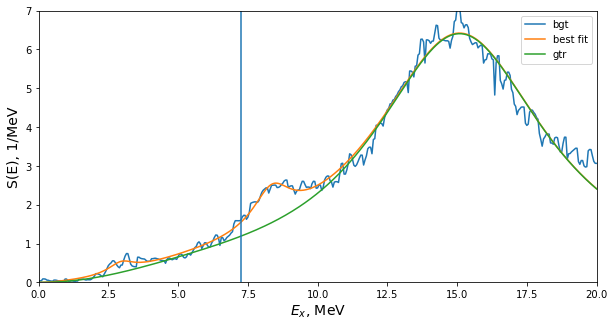

In [99]:
plt.figure(figsize=(10,5))
plt.plot(decomp['Ex, MeV'].values, decomp['bgt'].values, label='bgt')
plt.plot(decomp['Ex, MeV'].values, decomp['best_fit'].values, label='best fit')
plt.plot(decomp['Ex, MeV'].values, decomp['gtr'].values, label='gtr')
plt.xlabel('$E_{x}$, MeV', fontsize=14)
plt.ylabel('S(E), 1/MeV', fontsize=14)
plt.axvline(S_n)
plt.xlim(0,20)
plt.ylim(0,7)
plt.legend()
plt.show()

In [100]:
y_total_border = border_func(decomp['Ex, MeV'].values, decomp['best_fit'].values, S_n)
y_total125_border = border_func(decomp['Ex, MeV'].values, decomp['best_fit125'].values, S_n)
y_bgt_border = border_func(decomp['Ex, MeV'].values, decomp['bgt'].values, S_n)
y_gtr_border = border_func(decomp['Ex, MeV'].values, decomp['gtr'].values, S_n)
y_pr1_border = border_func(decomp['Ex, MeV'].values, decomp['pr1'].values, S_n)
y_pr2_border = border_func(decomp['Ex, MeV'].values, decomp['pr2'].values, S_n)

### y_total

In [101]:
sigma_y_tot_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp['best_fit'].values, 200) for p in p_list]
sigma_y_tot_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_y_tot_no_border_temp)

sigma_y_tot_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                   y_total_border, 200) for p in p_list]
sigma_y_tot_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_y_tot_border_temp)

In [102]:
### BS05OP
rate_calc(sigma_y_tot_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 23.200612768659727,
 'hep': 0.09472761074793284,
 'n13': 0.005958197278087533,
 'o15': 0.06707665093187354,
 'f17': 0.0017162357708973093,
 'pep': 0.12143175058214362,
 'Be': 0.04284642882190375,
 'Total': 23.534369642792562}

In [103]:
rate_calc(sigma_y_tot_no_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 27.8964624435134,
 'hep': 0.16910412232226354,
 'n13': 0.005958197278087533,
 'o15': 0.06707665093187354,
 'f17': 0.0017162357708973093,
 'pep': 0.12143175058214362,
 'Be': 0.04284642882190375,
 'Total': 28.304595829220567}

In [104]:
integrated_cross_sec_calc(sigma_y_tot_border_full, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 4.0774363389560156e-42,
 'hep': 1.1945474243118895e-41,
 'n13': 1.940780872341216e-47,
 'o15': 2.878826220252082e-46,
 'f17': 2.938759881673474e-46,
 'pep': 8.551531731136874e-46,
 'Be': 8.852567938409866e-48,
 'Total': 1.602437575423488e-41}

In [105]:
integrated_cross_sec_calc(sigma_y_tot_no_border_full, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 4.902717476891634e-42,
 'hep': 2.132460558918834e-41,
 'n13': 1.940780872341216e-47,
 'o15': 2.878826220252082e-46,
 'f17': 2.938759881673474e-46,
 'pep': 8.551531731136874e-46,
 'Be': 8.852567938409866e-48,
 'Total': 2.6228788238239946e-41}

### y_total + 125 kev level

In [154]:
sigma_y_tot125_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp['best_fit125'].values, 200) for p in p_list]
sigma_y_tot125_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_y_tot125_no_border_temp)

sigma_y_tot125_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                   y_total125_border, 200) for p in p_list]
sigma_y_tot125_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_y_tot125_border_temp)

In [155]:
### BS05OP
rate_calc(sigma_y_tot125_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 23.72966783487402,
 'hep': 0.09602765591711396,
 'n13': 0.1483242686033799,
 'o15': 0.4577592320864679,
 'f17': 0.01159833580077341,
 'pep': 0.6625349084380411,
 'Be': 2.656200827733728,
 'Total': 27.762113063453523}

In [156]:
rate_calc(sigma_y_tot125_no_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 28.42551750972769,
 'hep': 0.17040416749144469,
 'n13': 0.1483242686033799,
 'o15': 0.4577592320864679,
 'f17': 0.01159833580077341,
 'pep': 0.6625349084380411,
 'Be': 2.656200827733728,
 'Total': 32.532339249881524}

In [157]:
integrated_cross_sec_calc(sigma_y_tot125_border_full, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 4.170416139696665e-42,
 'hep': 1.2109414365335934e-41,
 'n13': 4.831409400761559e-46,
 'o15': 1.964631897366815e-45,
 'f17': 1.9860164042420226e-45,
 'pep': 4.665738791817191e-45,
 'Be': 5.488018239119273e-46,
 'Total': 1.6289478834890012e-41}

In [158]:
integrated_cross_sec_calc(sigma_y_tot125_no_border_full, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 4.995697277632283e-42,
 'hep': 2.148854571140538e-41,
 'n13': 4.831409400761559e-46,
 'o15': 1.964631897366815e-45,
 'f17': 1.9860164042420226e-45,
 'pep': 4.665738791817191e-45,
 'Be': 5.488018239119273e-46,
 'Total': 2.649389131889507e-41}

### bgt

In [69]:
sigma_y_bgt_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp['bgt'].values, 200) for p in p_list]
sigma_y_bgt_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_y_bgt_no_border_temp)

sigma_y_bgt_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                   y_bgt_border, 200) for p in p_list]
sigma_y_bgt_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_y_bgt_border_temp)

In [70]:
### BS05OP
rate_calc(sigma_y_bgt_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 22.635605452920096,
 'hep': 0.09220990915825145,
 'n13': 0.15065796746606105,
 'o15': 0.5107931227319378,
 'f17': 0.012950287773290733,
 'pep': 0.7703982567818012,
 'Be': 2.656200827733728,
 'Total': 26.82881582456516}

In [71]:
rate_calc(sigma_y_bgt_no_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 27.38779229862022,
 'hep': 0.1665946987937388,
 'n13': 0.15065796746606105,
 'o15': 0.5107931227319378,
 'f17': 0.012950287773290733,
 'pep': 0.7703982567818012,
 'Be': 2.656200827733728,
 'Total': 31.65538745990077}

### gtr

In [159]:
sigma_gtr_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp['gtr'].values, 200) for p in p_list]
sigma_gtr_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_gtr_no_border_temp)

sigma_gtr_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                   y_gtr_border, 200) for p in p_list]
sigma_gtr_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_gtr_border_temp)

In [165]:
### BS05OP
rate_calc((sigma_y_tot125_border_full-sigma_gtr_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 7.0285644487508625,
 'hep': 0.02468987443810932,
 'n13': 0.14605030348766654,
 'o15': 0.43009784982512794,
 'f17': 0.01088984177394611,
 'pep': 0.6126365697390199,
 'Be': 2.6400218621403524,
 'Total': 10.892950750155086}

In [166]:
rate_calc((sigma_y_tot125_no_border_full-sigma_gtr_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 8.339255218814271,
 'hep': 0.03919900858379653,
 'n13': 0.14605030348766654,
 'o15': 0.43009784982512794,
 'f17': 0.01088984177394611,
 'pep': 0.6126365697390199,
 'Be': 2.6400218621403524,
 'Total': 12.21815065436418}

### pr1

In [162]:
sigma_pr1_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp['pr1'].values, 200) for p in p_list]
sigma_pr1_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_pr1_no_border_temp)

sigma_pr1_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                   y_pr1_border, 200) for p in p_list]
sigma_pr1_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_pr1_border_temp)

In [167]:
### BS05OP
rate_calc((sigma_y_tot125_border_full-sigma_gtr_border_full-sigma_pr1_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 5.0538961265333215,
 'hep': 0.015899463847467196,
 'n13': 0.1448790829223284,
 'o15': 0.4173711339850529,
 'f17': 0.010564380423671565,
 'pep': 0.5895434507444224,
 'Be': 2.6314910311146433,
 'Total': 8.863644669570906}

In [168]:
rate_calc((sigma_y_tot125_no_border_full-sigma_gtr_no_border_full-sigma_pr1_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 5.060381057768212,
 'hep': 0.01597177214535691,
 'n13': 0.1448790829223284,
 'o15': 0.4173711339850529,
 'f17': 0.010564380423671565,
 'pep': 0.5895434507444224,
 'Be': 2.6314910311146433,
 'Total': 8.870201909103686}

### pr2

In [100]:
sigma_pr2_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp['pr2'].values, 200) for p in p_list]
sigma_pr2_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_pr2_no_border_temp)

sigma_pr2_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                   y_pr2_border, 200) for p in p_list]
sigma_pr2_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_pr2_border_temp)

In [101]:
output_table = pd.DataFrame(data=[], columns=['name','Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 
                                              'pp',  'Total'])

In [102]:
no1 = rate_calc(sigma_y_bgt_no_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (график bgt)')

no2 = rate_calc(sigma_y_tot_no_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (best_fit)')
no3 = rate_calc(sigma_matr_no_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,
               name='R-total (theory)')

no4 = rate_calc((sigma_y_tot_no_border_full-sigma_gtr_no_border_full), BS05OP_flux, 
                Energy_all_fluxes, step_all_fluxes,name='R-total (best_fit) - GTR')
no5 = rate_calc(sigma_matr_noGTR_no_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (theory) - GTR')

no6 = rate_calc((sigma_y_tot_no_border_full-sigma_gtr_no_border_full-sigma_pr1_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes, name='R-total (best_fit) - GTR - PR1')
no7 = rate_calc(sigma_matr_noGTR_noPR1_no_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (theory) - GTR - PR1')

In [103]:
output_table = pd.DataFrame(data=[], columns=['name','Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 
                                              'pp',  'Total'])

for elem in [no1, no2, no3, no4, no5, no6, no7] : 
    output_table = output_table.append(elem, ignore_index=True)
    
for elem in ['Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 'pp',  'Total']:
    output_table[elem] = output_table[elem].round(3)
output_table

,name,Be,f17,b8,n13,pep,o15,hep,pp,Total
0,R-total (график bgt),2.656,0.013,27.388,0.151,0.770,0.511,0.167,0.0,31.655
1,R-total (best_fit),0.043,0.002,27.896,0.006,0.121,0.067,0.169,0.0,28.305
2,R-total (theory),0.440,0.004,30.054,0.036,0.282,0.173,0.183,0.0,31.173
3,R-total (best_fit) - GTR,0.027,0.001,7.810,0.004,0.072,0.039,0.038,0.0,7.990
4,R-total (theory) - GTR,0.426,0.004,9.950,0.034,0.234,0.146,0.050,0.0,10.844
5,R-total (best_fit) - GTR - PR1,0.018,0.001,4.531,0.003,0.048,0.027,0.015,0.0,4.642
6,R-total (theory) - GTR - PR1,0.420,0.003,6.312,0.034,0.217,0.137,0.027,0.0,7.151


In [104]:
output_table.to_excel('no_border_comparison_Suslov.xls')

In [105]:
no11 = rate_calc(sigma_y_bgt_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (график bgt)')

no22 = rate_calc(sigma_y_tot_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (best_fit)')
no33 = rate_calc(sigma_matr_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,
               name='R-total (theory)')

no44 = rate_calc((sigma_y_tot_border_full-sigma_gtr_border_full), BS05OP_flux, 
                Energy_all_fluxes, step_all_fluxes,name='R-total (best_fit) - GTR')
no55 = rate_calc(sigma_matr_noGTR_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (theory) - GTR')

no66 = rate_calc((sigma_y_tot_border_full-sigma_gtr_border_full-sigma_pr1_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes, name='R-total (best_fit) - GTR - PR1')
no77 = rate_calc(sigma_matr_noGTR_noPR1_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (theory) - GTR - PR1')

In [106]:
output_table0 = pd.DataFrame(data=[], columns=['name','Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 
                                              'pp',  'Total'])

for elem in [no11, no22, no33, no44, no55, no66, no77] : 
    output_table0 = output_table0.append(elem, ignore_index=True)
    
for elem in ['Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 'pp',  'Total']:
    output_table0[elem] = output_table0[elem].round(3)
output_table0

,name,Be,f17,b8,n13,pep,o15,hep,pp,Total
0,R-total (график bgt),2.656,0.013,22.636,0.151,0.770,0.511,0.092,0.0,26.829
1,R-total (best_fit),0.043,0.002,23.201,0.006,0.121,0.067,0.095,0.0,23.534
2,R-total (theory),0.440,0.004,25.269,0.036,0.282,0.173,0.106,0.0,26.311
3,R-total (best_fit) - GTR,0.027,0.001,6.500,0.004,0.072,0.039,0.023,0.0,6.665
4,R-total (theory) - GTR,0.426,0.004,8.621,0.034,0.234,0.146,0.034,0.0,9.499
5,R-total (best_fit) - GTR - PR1,0.018,0.001,4.525,0.003,0.048,0.027,0.015,0.0,4.636
6,R-total (theory) - GTR - PR1,0.420,0.003,6.026,0.034,0.217,0.137,0.022,0.0,6.860


In [107]:
output_table0.to_excel('border_comparison_Suslov.xls')

## декомпозиция гауссом

In [113]:
decomp_gauss = pd.read_excel('127Xe_decomp_decomp_gauss.xls')
decomp_gauss.head(20)

,"Ex, MeV",bgt,best_fit,gtr,pr1,pr2
0,0.00,0.014032,0.001011,8.778301e-08,0.000162,0.000849
1,0.05,0.041647,0.001196,9.899487e-08,0.000181,0.001015
2,0.10,0.041647,0.001412,1.115941e-07,0.000202,0.001210
3,0.15,0.089973,0.001664,1.257465e-07,0.000224,0.001439
4,0.20,0.089973,0.001957,1.416371e-07,0.000250,0.001708
5,0.25,0.083343,0.002299,1.594719e-07,0.000278,0.002021
6,0.30,0.058906,0.002694,1.794808e-07,0.000308,0.002386
7,0.35,0.054557,0.003152,2.019193e-07,0.000343,0.002809
8,0.40,0.041694,0.003680,2.270722e-07,0.000380,0.003300
9,0.45,0.035951,0.004288,2.552563e-07,0.000422,0.003866


In [114]:
trapz(decomp_gauss['bgt'].values, decomp_gauss['Ex, MeV'].values),\
trapz(decomp_gauss['best_fit'].values, decomp_gauss['Ex, MeV'].values),\
trapz(decomp_gauss['gtr'].values, decomp_gauss['Ex, MeV'].values), \
trapz(decomp_gauss['pr1'].values, decomp_gauss['Ex, MeV'].values), \
trapz(decomp_gauss['pr2'].values, decomp_gauss['Ex, MeV'].values), \

(55.58062392490359,
 51.97414344291188,
 39.76101140057214,
 10.856831308556293,
 1.3563007337834554)

In [115]:
#добавим в best fit кусок с уровнем 125кэВ
decomp_gauss['best_fit125'] = decomp_gauss['bgt'][(decomp_gauss['Ex, MeV'] < 0.4)].append(decomp_gauss['best_fit'][decomp_gauss['Ex, MeV'] >= 0.4])

In [116]:
trapz(decomp_gauss['bgt'].values, decomp_gauss['Ex, MeV'].values),\
trapz(decomp_gauss['best_fit'].values, decomp_gauss['Ex, MeV'].values),\
trapz(decomp_gauss['gtr'].values, decomp_gauss['Ex, MeV'].values), \
trapz(decomp_gauss['pr1'].values, decomp_gauss['Ex, MeV'].values), \
trapz(decomp_gauss['pr2'].values, decomp_gauss['Ex, MeV'].values), \

(55.58062392490359,
 51.97414344291188,
 39.76101140057214,
 10.856831308556293,
 1.3563007337834554)

In [117]:
decomp_gauss.head(12)

,"Ex, MeV",bgt,best_fit,gtr,pr1,pr2,best_fit125
0,0.00,0.014032,0.001011,8.778301e-08,0.000162,0.000849,0.014032
1,0.05,0.041647,0.001196,9.899487e-08,0.000181,0.001015,0.041647
2,0.10,0.041647,0.001412,1.115941e-07,0.000202,0.001210,0.041647
3,0.15,0.089973,0.001664,1.257465e-07,0.000224,0.001439,0.089973
4,0.20,0.089973,0.001957,1.416371e-07,0.000250,0.001708,0.089973
5,0.25,0.083343,0.002299,1.594719e-07,0.000278,0.002021,0.083343
6,0.30,0.058906,0.002694,1.794808e-07,0.000308,0.002386,0.058906
7,0.35,0.054557,0.003152,2.019193e-07,0.000343,0.002809,0.054557
8,0.40,0.041694,0.003680,2.270722e-07,0.000380,0.003300,0.003680
9,0.45,0.035951,0.004288,2.552563e-07,0.000422,0.003866,0.004288


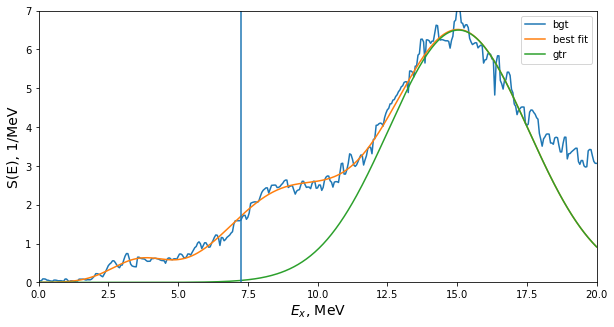

In [118]:
plt.figure(figsize=(10,5))
plt.plot(decomp_gauss['Ex, MeV'].values, decomp_gauss['bgt'].values, label='bgt')
plt.plot(decomp_gauss['Ex, MeV'].values, decomp_gauss['best_fit'].values, label='best fit')
plt.plot(decomp_gauss['Ex, MeV'].values, decomp_gauss['gtr'].values, label='gtr')
plt.xlabel('$E_{x}$, MeV', fontsize=14)
plt.ylabel('S(E), 1/MeV', fontsize=14)
plt.axvline(S_n)
plt.xlim(0,20)
plt.ylim(0,7)
plt.legend()
plt.show()

In [137]:
y_gauss_total125_border = border_func(decomp_gauss['Ex, MeV'].values, decomp_gauss['best_fit125'].values, S_n)
y_gauss_bgt_border = border_func(decomp_gauss['Ex, MeV'].values, decomp_gauss['bgt'].values, S_n)
y_gauss_gtr_border = border_func(decomp_gauss['Ex, MeV'].values, decomp_gauss['gtr'].values, S_n)
y_gauss_pr1_border = border_func(decomp_gauss['Ex, MeV'].values, decomp_gauss['pr1'].values, S_n)
y_gauss_pr2_border = border_func(decomp_gauss['Ex, MeV'].values, decomp_gauss['pr2'].values, S_n)

In [152]:
trapz(border_func(decomp['Ex, MeV'].values, decomp['bgt'].values, 0.25), decomp['Ex, MeV'].values)

0.013512805026800115

### y_total + 125 kev level

In [120]:
sigma_y_gauss_tot125_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                      decomp_gauss['best_fit125'].values, 200) for p in p_list]
sigma_y_gauss_tot125_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_y_gauss_tot125_no_border_temp)

sigma_y_gauss_tot125_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                   y_gauss_total125_border, 200) for p in p_list]
sigma_y_gauss_tot125_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_y_gauss_tot125_border_temp)

In [126]:
### BS05OP
rate_calc(sigma_y_gauss_tot125_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 21.820941748088696,
 'hep': 0.08993265442548563,
 'n13': 0.1475632977512618,
 'o15': 0.4230395825253052,
 'f17': 0.010706861857407525,
 'pep': 0.5952016340965224,
 'Be': 2.656200827733728,
 'Total': 25.743586606478406}

In [125]:
rate_calc(sigma_y_gauss_tot125_no_border_full, \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 26.53973677409313,
 'hep': 0.16391250876802108,
 'n13': 0.1475632977512618,
 'o15': 0.4230395825253052,
 'f17': 0.010706861857407525,
 'pep': 0.5952016340965224,
 'Be': 2.656200827733728,
 'Total': 30.536361486825374}

### gtr

In [128]:
sigma_gtr_gauss_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp['Ex, MeV'].values, 
                                      decomp_gauss['gtr'].values, 200) for p in p_list]
sigma_gtr_gauss_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_gtr_gauss_no_border_temp)

sigma_gtr_gauss_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                   y_gauss_gtr_border, 200) for p in p_list]
sigma_gtr_gauss_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_gtr_gauss_border_temp)

In [130]:
### BS05OP
rate_calc((sigma_y_gauss_tot125_border_full-sigma_gtr_gauss_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 21.729641811432288,
 'hep': 0.08938420879504899,
 'n13': 0.14756295329593191,
 'o15': 0.42303788639943846,
 'f17': 0.01070681866231283,
 'pep': 0.595198857839591,
 'Be': 2.656195215879289,
 'Total': 25.651727752303902}

In [141]:
### BS05OP
rate_calc((sigma_gtr_gauss_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 0.6778309368276875,
 'hep': 0.023850886517692852,
 'n13': 3.4445532987882225e-07,
 'o15': 1.6961258666989063e-06,
 'f17': 4.3195094693448994e-08,
 'pep': 2.776256931345703e-06,
 'Be': 5.611854439454822e-06,
 'Total': 0.7016922952330424}

In [133]:
rate_calc((sigma_y_gauss_tot125_no_border_full-sigma_gtr_gauss_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 25.861905837265436,
 'hep': 0.14006162225032825,
 'n13': 0.14756295329593191,
 'o15': 0.42303788639943846,
 'f17': 0.01070681866231283,
 'pep': 0.595198857839591,
 'Be': 2.656195215879289,
 'Total': 29.83466919159233}

### pr1

In [134]:
sigma_pr1_gauss_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                      decomp_gauss['pr1'].values, 200) for p in p_list]
sigma_pr1_gauss_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_pr1_gauss_no_border_temp)

sigma_pr1_gauss_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                   y_gauss_pr1_border, 200) for p in p_list]
sigma_pr1_gauss_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_pr1_gauss_border_temp)

In [135]:
### BS05OP
rate_calc((sigma_y_gauss_tot125_border_full-sigma_gtr_gauss_border_full-sigma_pr1_gauss_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 13.27013755711537,
 'hep': 0.04527173672937096,
 'n13': 0.14695114816037957,
 'o15': 0.4201797327823188,
 'f17': 0.010634078876169321,
 'pep': 0.5905524828086653,
 'Be': 2.6460588826433926,
 'Total': 17.129785619115665}

In [136]:
rate_calc((sigma_y_gauss_tot125_no_border_full-sigma_gtr_gauss_no_border_full-sigma_pr1_gauss_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 13.270409572257444,
 'hep': 0.045273918371060526,
 'n13': 0.14695114816037957,
 'o15': 0.4201797327823188,
 'f17': 0.010634078876169321,
 'pep': 0.5905524828086653,
 'Be': 2.6460588826433926,
 'Total': 17.13005981589943}

### pr2

In [138]:
sigma_pr2_gauss_no_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                      decomp_gauss['pr2'].values, 200) for p in p_list]
sigma_pr2_gauss_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                     fp=sigma_pr2_gauss_no_border_temp)

sigma_pr2_gauss_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp_gauss['Ex, MeV'].values, 
                                   y_gauss_pr2_border, 200) for p in p_list]
sigma_pr2_gauss_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_pr2_gauss_border_temp)

In [139]:
### BS05OP
rate_calc((sigma_y_gauss_tot125_border_full-sigma_gtr_gauss_border_full-sigma_pr1_gauss_border_full-sigma_pr2_gauss_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 0.54089037701563,
 'hep': 0.0013295158834745106,
 'n13': 0.14292814864253597,
 'o15': 0.39616935233065487,
 'f17': 0.010021357222918947,
 'pep': 0.550306779437098,
 'Be': 2.585258603747128,
 'Total': 4.22690413427944}

In [140]:
rate_calc((sigma_y_gauss_tot125_no_border_full-sigma_gtr_gauss_no_border_full-sigma_pr1_gauss_no_border_full-sigma_pr2_gauss_no_border_full), \
          BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 0.54089037701563,
 'hep': 0.0013295158834745106,
 'n13': 0.14292814864253597,
 'o15': 0.39616935233065487,
 'f17': 0.010021357222918947,
 'pep': 0.550306779437098,
 'Be': 2.585258603747128,
 'Total': 4.22690413427944}

### данные из графика BGT

In [45]:
bgt_full = pd.read_csv('../B(GT) peaks processing/recognition/Xe127/1999_bgt_full.csv', 
                      sep=';', decimal=',', names=['x', 'y'])
bgt_0_5 = pd.read_csv('../B(GT) peaks processing/recognition/Xe127/1999_bgt_0_5l.csv', 
                      sep=';', decimal=',', names=['x', 'y'])

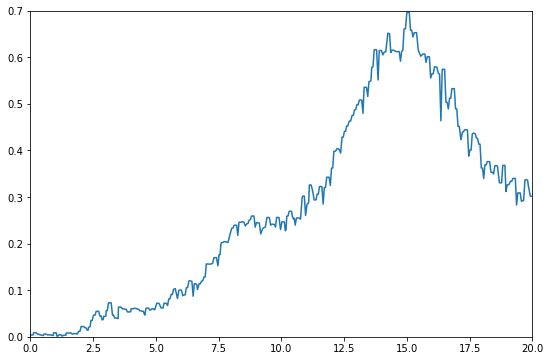

In [46]:
bgt = bgt_0_5.append(bgt_full[bgt_full['x']>5])

plt.figure(figsize=(9,6))
plt.plot(bgt['x'].values, bgt['y'].values)
plt.xlim(0,20)
plt.ylim(0,0.7)
plt.show()

In [47]:
trapz(bgt['y'].values, bgt['x'].values)

5.463277472256921

(0.0, 7.0)

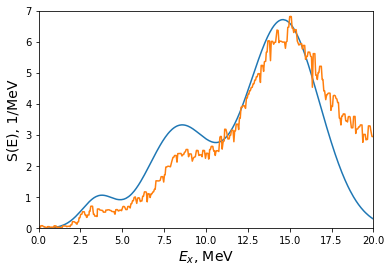

In [48]:
y_bgt = bgt['y'].values / trapz(bgt['y'].values, bgt['x'].values) \
* total_GT
y_bgt_border = border_func(bgt['x'].values, y_bgt, S_n)


plt.plot(best_fit['Ex, MeV'].values, y)
plt.plot(bgt['x'].values, y_bgt, )
plt.xlabel('$E_{x}$, MeV', fontsize=14)
plt.ylabel('S(E), 1/MeV', fontsize=14)
plt.xlim(0,20)
plt.ylim(0,7)
#plt.savefig('S_E_func_76Ge.png', format='png', dpi=400)


In [49]:
sigma_bgt_border_temp = [cross_sec(0,p, sigma_k_GTR, bgt['x'].values, y_bgt_border, 200) for p in p_list]

sigma_bgt_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, fp=sigma_bgt_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

KeyboardInterrupt: 

In [ ]:
sigma_bgt_no_border_temp = [cross_sec(0,p, sigma_k_GTR, bgt['x'].values, y_bgt, 200) for p in p_list]

sigma_bgt_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, fp=sigma_bgt_no_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

### BS05OP

In [37]:
rate_calc(sigma_bgt_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 21.881159738608968,
 'hep': 0.08911073889639085,
 'n13': 0.14566121565968568,
 'o15': 0.49081213657970474,
 'f17': 0.012443535260837814,
 'pep': 0.7389055569223173,
 'Be': 2.5621711037070085,
 'Total': 25.920264025634918}

In [38]:
rate_calc(sigma_bgt_no_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 26.4607341508704,
 'hep': 0.16080692460071908,
 'n13': 0.14566121565968568,
 'o15': 0.49081213657970474,
 'f17': 0.012443535260837814,
 'pep': 0.7389055569223173,
 'Be': 2.5621711037070085,
 'Total': 30.57153462360068}

## Матричные элементы от ЮС

In [142]:
En = np.array([0.2, 0.54, 1.58, 1.97, 2.76, 3.08, 3.45, 6.0, 8.34, 14.8, 20.59, 20.94, \
               21.09, 21.22, 29.70])

Mn = 2*np.array([0.0025, 0.0025, 0.01, 0.01, 0.02, 0.10, 0.01, 0.2, 1.2, 30.8, 0.5, 0.8, \
               0.5, 1.03, 6.3])

np.sum(Mn)

82.97

In [143]:
def breit_vigner3(x, M, w,  G1):
    G = G1
    y = M * (G**1) * (1-np.exp(-(x/G)**2) ) / ((x - w)**2 + (G**2)/1)
    return np.round(y, decimals=5) #округляем чтобы убрать неустойчивость расчета изза хвостов

Ex = np.arange(0,40,0.01)
w = En
M_square = Mn
alpha = 0.018


norm_factors = []
for w_i,M_i in zip(w, M_square):
    y_values = breit_vigner3(Ex, 1, w_i, alpha*w_i**2)
    norm_factors.append(trapz(y_values, Ex))

In [144]:
plots = np.zeros((w.shape[0], Ex.shape[0]))
for idx, w_i, M_i, norm_i in zip(range(w.shape[0]), w, M_square, norm_factors):
    amplitude = M_i / norm_i
    y_values = breit_vigner3(Ex, amplitude, w_i, alpha*w_i**2)
    plots[idx] = y_values
    
summ = np.sum(plots, axis=0)

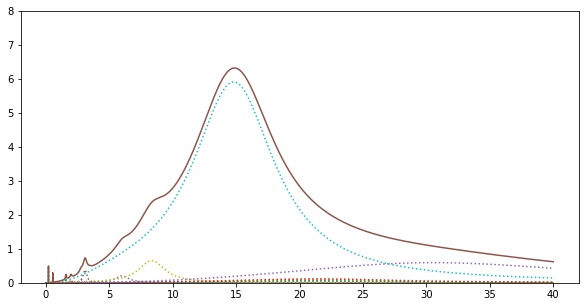

In [145]:
plt.figure(figsize=(10,5))
plt.ylim(0,8)
for elem in plots:
    plt.plot(Ex, elem, ls=':')
plt.plot(Ex, summ)
plt.show()

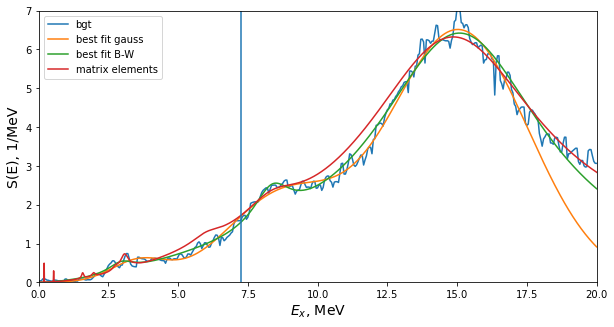

In [147]:
plt.figure(figsize=(10,5))
plt.plot(decomp_gauss['Ex, MeV'].values, decomp_gauss['bgt'].values, label='bgt')
plt.plot(decomp_gauss['Ex, MeV'].values, decomp_gauss['best_fit'].values, label='best fit gauss')
plt.plot(decomp['Ex, MeV'].values, decomp['best_fit'].values, label='best fit B-W')
plt.plot(Ex, summ, label='matrix elements')
plt.xlabel('$E_{x}$, MeV', fontsize=14)
plt.ylabel('S(E), 1/MeV', fontsize=14)
plt.axvline(S_n)
plt.xlim(0,20)
plt.ylim(0,7)
plt.legend()
plt.show()

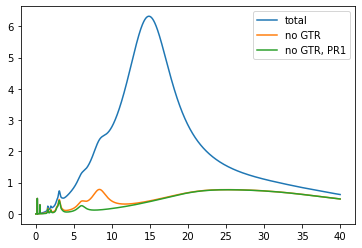

In [148]:
summ_border = border_func(Ex, summ, S_n)
summ_noGTR = summ - plots[9]
summ_noGTR_border = border_func(Ex, summ_noGTR, S_n)
summ_noGTR_PR1 = summ_noGTR - plots[8]
summ_noGTR_PR1_border = border_func(Ex, summ_noGTR_PR1, S_n)

plt.plot(Ex, summ, label='total')
plt.plot(Ex, summ_noGTR, label='no GTR')
plt.plot(Ex, summ_noGTR_PR1, label='no GTR, PR1')
plt.legend()
plt.show()

In [153]:
trapz(border_func(Ex, summ, 0.3), Ex)

0.005703099999999997

### total

In [149]:
sigma_matr_no_border_temp = [cross_sec(0,p, sigma_k_GTR, Ex, summ, 200) for p in p_list]

sigma_matr_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, fp=sigma_matr_no_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

sigma_matr_border_temp = [cross_sec(0,p, sigma_k_GTR, Ex, summ_border, 200) for p in p_list]

sigma_matr_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, fp=sigma_matr_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

In [150]:
### BS05OP
rate_calc(sigma_matr_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'name': 'test1',
 'pp': 0.0,
 'b8': 25.269256933783097,
 'hep': 0.10558417433000096,
 'n13': 0.036476846753811076,
 'o15': 0.17261012478378232,
 'f17': 0.0043872536988636265,
 'pep': 0.2818157948549314,
 'Be': 0.4404635920791998,
 'Total': 26.31059472028369}

In [75]:
### BS05OP
rate_calc(sigma_matr_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'Be': 0.4404635920791998,
 'Total': 26.31059472028369,
 'b8': 25.269256933783097,
 'f17': 0.0043872536988636265,
 'hep': 0.10558417433000096,
 'n13': 0.036476846753811076,
 'name': 'test1',
 'o15': 0.17261012478378232,
 'pep': 0.2818157948549314,
 'pp': 0.0}

In [76]:
rate_calc(sigma_matr_no_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'Be': 0.4404635920791998,
 'Total': 31.172728530592085,
 'b8': 30.0539409974404,
 'f17': 0.0043872536988636265,
 'hep': 0.1830339209810961,
 'n13': 0.036476846753811076,
 'name': 'test1',
 'o15': 0.17261012478378232,
 'pep': 0.2818157948549314,
 'pp': 0.0}

### no GTR

In [77]:
sigma_matr_noGTR_no_border_temp = [cross_sec(0,p, sigma_k_GTR, Ex, summ_noGTR, 200) for p in p_list]

sigma_matr_noGTR_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                      fp=sigma_matr_noGTR_no_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

sigma_matr_noGTR_border_temp = [cross_sec(0,p, sigma_k_GTR, Ex, summ_noGTR_border, 200) for p in p_list]

sigma_matr_noGTR_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                         fp=sigma_matr_noGTR_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

In [78]:
### BS05OP
rate_calc(sigma_matr_noGTR_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'Be': 0.4257266826133219,
 'Total': 9.499447286660633,
 'b8': 8.621046596243314,
 'f17': 0.0037136122247794535,
 'hep': 0.03396286166007162,
 'n13': 0.03434208027500156,
 'name': 'test1',
 'o15': 0.14631093150831417,
 'pep': 0.23434452213583135,
 'pp': 0.0}

In [79]:
rate_calc(sigma_matr_noGTR_no_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'Be': 0.4257266826133219,
 'Total': 10.84430625564878,
 'b8': 9.949506627468185,
 'f17': 0.0037136122247794535,
 'hep': 0.050361799423347335,
 'n13': 0.03434208027500156,
 'name': 'test1',
 'o15': 0.14631093150831417,
 'pep': 0.23434452213583135,
 'pp': 0.0}

### no GTR no PR1

In [80]:
sigma_matr_noGTR_noPR1_no_border_temp = [cross_sec(0,p, sigma_k_GTR, Ex, summ_noGTR_PR1, 200) for p in p_list]

sigma_matr_noGTR_noPR1_no_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                      fp=sigma_matr_noGTR_noPR1_no_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

sigma_matr_noGTR_noPR1_border_temp = [cross_sec(0,p, sigma_k_GTR, Ex, summ_noGTR_PR1_border, 200) for p in p_list]

sigma_matr_noGTR_noPR1_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                   fp=sigma_matr_noGTR_noPR1_border_temp)
#sigma_more5_1 = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_76As, fp=sigma_more5_temp1)

In [81]:
### BS05OP
rate_calc(sigma_matr_noGTR_noPR1_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'Be': 0.42032049545480515,
 'Total': 6.859867254663135,
 'b8': 6.025643399824545,
 'f17': 0.0034747519103373883,
 'hep': 0.022448072879492867,
 'n13': 0.033558830512194306,
 'name': 'test1',
 'o15': 0.1369804957336968,
 'pep': 0.21744120834806374,
 'pp': 0.0}

In [82]:
rate_calc(sigma_matr_noGTR_noPR1_no_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,)

{'Be': 0.42032049545480515,
 'Total': 7.151162915514286,
 'b8': 6.312333768981634,
 'f17': 0.0034747519103373883,
 'hep': 0.0270533645735537,
 'n13': 0.033558830512194306,
 'name': 'test1',
 'o15': 0.1369804957336968,
 'pep': 0.21744120834806374,
 'pp': 0.0}

## check models with different $\alpha$ and $\beta$

In [116]:
decomp2 = pd.read_excel('127Xe_decomp_find_coeff.xls')
decomp2.head()

,"Ex, MeV",GTR (alpha E^2),PR1 (alpha E^2),PR2 (alpha E^2),alpha E^2,alpha E^2+beta E^3,alpha E^2-beta E^3,bgt
0,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.014032
1,0.05,0.00007,0.00003,0.00016,0.00026,0.00028,0.00026,0.041647
2,0.10,0.00027,0.00013,0.00056,0.00096,0.00102,0.00097,0.041647
3,0.15,0.00060,0.00030,0.00105,0.00195,0.00198,0.00200,0.089973
4,0.20,0.00108,0.00053,0.00148,0.00309,0.00300,0.00319,0.089973


In [109]:
trapz(decomp2['bgt'].values, decomp2['Ex, MeV'].values),\
trapz(decomp2['alpha E^2'].values, decomp2['Ex, MeV'].values),\
trapz(decomp2['alpha E^2+beta E^3'].values, decomp2['Ex, MeV'].values), \
trapz(decomp2['alpha E^2-beta E^3'].values, decomp2['Ex, MeV'].values), \

(55.58062392490359, 55.610859999999995, 55.47721875, 55.54809675)

In [110]:
y_bgt_border = border_func(decomp2['Ex, MeV'].values, decomp2['bgt'].values, S_n)
y_alph_border = border_func(decomp2['Ex, MeV'].values, decomp2['alpha E^2'].values, S_n)
y_alph_plus_b_border = border_func(decomp2['Ex, MeV'].values, decomp2['alpha E^2+beta E^3'].values, S_n)
y_alph_min_b_border = border_func(decomp2['Ex, MeV'].values, decomp2['alpha E^2-beta E^3'].values, S_n)

In [117]:
y_GTR_border = border_func(decomp2['Ex, MeV'].values, decomp2['GTR (alpha E^2)'].values, S_n)
y_PR1_border = border_func(decomp2['Ex, MeV'].values, decomp2['PR1 (alpha E^2)'].values, S_n)
y_PR2_border = border_func(decomp2['Ex, MeV'].values, decomp2['PR2 (alpha E^2)'].values, S_n)

In [111]:
sigma_bgt_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_bgt_border, 200) for p in p_list]
sigma_bgt_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_bgt_border_temp)

sigma_alph_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_alph_border, 200) for p in p_list]
sigma_alph_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_alph_border_temp)

In [112]:
sigma_alph_plus_b_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_alph_plus_b_border, 200) for p in p_list]
sigma_alph_plus_b_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_alph_plus_b_border_temp)

sigma_alph_min_b_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_alph_min_b_border, 200) for p in p_list]
sigma_alph_min_b_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_alph_min_b_border_temp)

In [113]:
no11 = rate_calc(sigma_bgt_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (график bgt)')

no22 = rate_calc(sigma_alph_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (alpha E^2)')
no33 = rate_calc(sigma_alph_plus_b_border_full, BS05OP_flux, Energy_all_fluxes, step_all_fluxes,
               name='R-total (alpha E^2+beta E^3)')
no44 = rate_calc((sigma_alph_min_b_border_full), BS05OP_flux, 
                Energy_all_fluxes, step_all_fluxes,name='R-total (alpha E^2-beta E^3)')


In [114]:
output_table0 = pd.DataFrame(data=[], columns=['name','Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 
                                              'pp',  'Total'])

for elem in [no11, no22, no33, no44] : 
    output_table0 = output_table0.append(elem, ignore_index=True)
    
for elem in ['Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 'pp',  'Total']:
    output_table0[elem] = output_table0[elem].round(3)
output_table0

,name,Be,f17,b8,n13,pep,o15,hep,pp,Total
0,R-total (график bgt),2.656,0.013,22.636,0.151,0.770,0.511,0.092,0.0,26.829
1,R-total (alpha E^2),0.052,0.001,22.879,0.006,0.094,0.053,0.095,0.0,23.180
2,R-total (alpha E^2+beta E^3),0.053,0.001,22.482,0.006,0.091,0.051,0.093,0.0,22.777
3,R-total (alpha E^2-beta E^3),0.053,0.001,23.199,0.006,0.097,0.054,0.096,0.0,23.506


In [115]:
output_table0.to_excel('127Xe_result_find_coeff_Suslov.xls')

In [118]:
sigma_GTR_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_GTR_border, 200) for p in p_list]
sigma_GTR_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_GTR_border_temp)

sigma_PR1_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_PR1_border, 200) for p in p_list]
sigma_PR1_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_PR1_border_temp)

sigma_PR2_border_temp = [cross_sec(0,p, sigma_k_GTR, decomp2['Ex, MeV'].values, 
                                   y_PR2_border, 200) for p in p_list]
sigma_PR2_border_full = np.interp(Energy_all_fluxes, xp=p_list+Q_EC_127Xe, 
                                  fp=sigma_PR2_border_temp)

In [119]:
no55 = rate_calc(sigma_bgt_border_full-sigma_GTR_border_full, BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (график bgt) - GTR')

no66 = rate_calc(sigma_bgt_border_full-sigma_GTR_border_full-sigma_PR1_border_full, 
                 BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (график bgt) - GTR - PR1')
no77 = rate_calc(sigma_bgt_border_full-sigma_GTR_border_full-sigma_PR1_border_full-sigma_PR2_border_full, 
                 BS05OP_flux, Energy_all_fluxes, 
                step_all_fluxes, name='R-total (график bgt) - GTR - PR1 - PR2')
#no44 = rate_calc((sigma_alph_min_b_border_full), BS05OP_flux, 
#                Energy_all_fluxes, step_all_fluxes,name='R-total (alpha E^2-beta E^3)')

In [120]:
output_table1 = pd.DataFrame(data=[], columns=['name','Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 
                                              'pp',  'Total'])

for elem in [no55, no66, no77] : 
    output_table1 = output_table1.append(elem, ignore_index=True)
    
for elem in ['Be', 'f17', 'b8', 'n13', 'pep', 'o15', 'hep', 'pp',  'Total']:
    output_table1[elem] = output_table1[elem].round(3)
output_table1

,name,Be,f17,b8,n13,pep,o15,hep,pp,Total
0,R-total (график bgt) - GTR,2.640,0.012,6.146,0.148,0.721,0.483,0.022,0.0,10.172
1,R-total (график bgt) - GTR - PR1,2.632,0.012,3.018,0.147,0.697,0.470,0.008,0.0,6.985
2,R-total (график bgt) - GTR - PR1 - PR2,2.604,0.012,-0.244,0.145,0.676,0.458,-0.003,0.0,3.648


In [122]:
output_table1.to_excel('127Xe_result_find_coeff_Suslov-GTR-PR.xls')